# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Udacity Starbucks Capstone Project

- Student provides a high-level overview of the project. Background information such as the problem domain, the project origin, and related data sets or input data is provided.
- The problem which needs to be solved is clearly defined. A strategy for solving the problem, including discussion of the expected solution, has been made.
- Metrics used to measure performance of a model or result are clearly defined. Metrics are justified based on the characteristics of the problem.

----

# Install dependencies

In [1]:
!pip install -r requirements.txt

In [2]:
!pip install ipython-autotime
# load execution time measurement tools 
%load_ext autotime

time: 0 ns (started: 2021-03-22 00:24:04 +01:00)


# Loading dataset

In [3]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns

# module for prediction
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

time: 3.47 s (started: 2021-03-22 00:24:04 +01:00)


# Helper method

In [4]:
def print_isna_proportion(ser: pd.Series):
    """
    Printing the proportion of isna value from a panda series.

    :param ser: panda series to be calculated for the proportion
    :return: None
    """
    print(f'Amount of isna value : {ser.isna().sum()} and its proportion : {ser.isna().sum() / len(ser)}')
    
print_isna_proportion(profile['gender'])

Amount of isna value : 2175 and its proportion : 0.12794117647058822
time: 15 ms (started: 2021-03-22 00:24:07 +01:00)


In [5]:
def print_metrics(y_test: pd.DataFrame, y_pred: pd.DataFrame):
    """
    Printing the accuracy and f1 score for the given dataframes.
    :param y_test: panda test dataframe
    :param y_pred: panda prediction dataframe
    """
    print("Accuracy for the model : ", accuracy_score(y_test, y_pred, normalize = True))
    print("F1-score for the model : ", f1_score(y_test, y_pred, average='weighted'))

time: 16 ms (started: 2021-03-22 00:24:07 +01:00)


In [6]:
def plot_distribution(df: pd.DataFrame, column: str, target_column: str = 'offer_successful'):
    """
    Plotting a distribution plot of a given dataframe based on given column and target_column
    :param df: panda dataframe to be ploted
    :param column: column to be plotted (x-axis)
    :param target_column: target column to be plotted (y-axis)

    """
    sns.displot(merged_dataframe, x=column, hue=target_column, multiple="dodge").set(title=f'Distribution by {column}')

time: 15 ms (started: 2021-03-22 00:24:07 +01:00)


# 1. Business Understanding

Following questions will be examined and answered:
- How much starbucks customer completed a reward ?
- What kind of offer type most customer view and completed?
- Could a prediction be made, either a customer will take a reward or not? So a targeted marketing could be done!

# 2. Data Understanding

## 2.1. Portfolio Dataset

* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

In [7]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


time: 16 ms (started: 2021-03-22 00:24:07 +01:00)


In [8]:
portfolio.shape

(10, 6)

time: 0 ns (started: 2021-03-22 00:24:07 +01:00)


In [9]:
portfolio.dtypes

reward         int64
channels      object
difficulty     int64
duration       int64
offer_type    object
id            object
dtype: object

time: 15 ms (started: 2021-03-22 00:24:07 +01:00)


### 2.1.1 `reward` feature

In [10]:
portfolio['reward'].value_counts()

5     3
10    2
2     2
0     2
3     1
Name: reward, dtype: int64

time: 16 ms (started: 2021-03-22 00:24:07 +01:00)


### 2.1.2 `channels` feature

In [11]:
portfolio['channels']

0         [email, mobile, social]
1    [web, email, mobile, social]
2            [web, email, mobile]
3            [web, email, mobile]
4                    [web, email]
5    [web, email, mobile, social]
6    [web, email, mobile, social]
7         [email, mobile, social]
8    [web, email, mobile, social]
9            [web, email, mobile]
Name: channels, dtype: object

time: 16 ms (started: 2021-03-22 00:24:07 +01:00)


### 2.1.3 `difficulty` feature

In [12]:
portfolio['difficulty'].value_counts()

10    4
5     2
0     2
7     1
20    1
Name: difficulty, dtype: int64

time: 16 ms (started: 2021-03-22 00:24:07 +01:00)


### 2.1.4 `duration` feature

In [13]:
portfolio['duration'].value_counts()

7     4
10    2
5     2
4     1
3     1
Name: duration, dtype: int64

time: 16 ms (started: 2021-03-22 00:24:07 +01:00)


### 2.1.5 `over_type` feature

In [14]:
portfolio['offer_type'].value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

time: 0 ns (started: 2021-03-22 00:24:07 +01:00)


### 2.1.5 `id` feature

In [15]:
portfolio['id'].nunique()

10

time: 15 ms (started: 2021-03-22 00:24:07 +01:00)


=> There are no duplicate value (by id)

### **Summary**
- has **10** entries and no duplicated `id`
- `channels` has list of a string => has a potential to be splitted into multiple column 
- `offer type` has only 3 possible value (`discount`, `bogo`, `informational`) => One Hot Encoding
- `reward`, `diffculty`, `duration` contains numerical data

## 2.2. Profile Dataset

* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

In [16]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


time: 16 ms (started: 2021-03-22 00:24:07 +01:00)


In [17]:
profile.shape

(17000, 5)

time: 0 ns (started: 2021-03-22 00:24:07 +01:00)


In [18]:
profile.dtypes

gender               object
age                   int64
id                   object
became_member_on      int64
income              float64
dtype: object

time: 16 ms (started: 2021-03-22 00:24:07 +01:00)


In [19]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB
time: 15 ms (started: 2021-03-22 00:24:07 +01:00)


=> Check gender and income for missing value

### 2.2.1 `gender` feature

* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)

In [20]:
print_isna_proportion(profile['gender'])

Amount of isna value : 2175 and its proportion : 0.12794117647058822
time: 0 ns (started: 2021-03-22 00:24:07 +01:00)


In [21]:
profile[(profile['gender'] != 'F') & (profile['gender'] != 'M') & (profile['gender'].notna())]

,gender,age,id,became_member_on,income
31,O,53,d1ede868e29245ea91818a903fec04c6,20170916,52000.0
273,O,60,d0be9ff460964c3398a33ad9b2829f3a,20180216,94000.0
383,O,49,0d0a9ca9281248a8a35806c9ae68f872,20171207,42000.0
513,O,63,01f46a5191424005af436cdf48a5da7c,20150920,89000.0
576,O,73,644ac06dc9b34a5bbd237a465cf47571,20180316,88000.0
...,...,...,...,...,...
16670,O,76,e8926849bbe24ce488d4f3fcd3b537e8,20180320,52000.0
16683,O,49,1f68e9b6850f49348235a281a47d9f15,20170607,56000.0
16731,O,51,a97208c5be42445d9949e82e0f70f622,20160707,55000.0
16741,O,56,994b6ef7a8ca46e3b379518399f6ec93,20180221,52000.0


time: 31 ms (started: 2021-03-22 00:24:07 +01:00)


=> in `gender` feature, there are 212 data containing **O**

### 2.2.2 `age` feature

=> From the `.head()` above, age 118 looks like strange number for a customer ageprofile['age'].hist()

<AxesSubplot:>

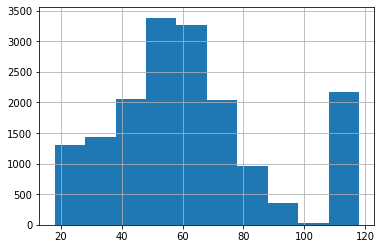

time: 172 ms (started: 2021-03-22 00:24:07 +01:00)


In [22]:
profile['age'].hist()

In [23]:
profile[profile['age'] >= 118].count()

gender                 0
age                 2175
id                  2175
became_member_on    2175
income                 0
dtype: int64

time: 16 ms (started: 2021-03-22 00:24:08 +01:00)


In [24]:
profile[profile['age'] >= 118].income.isna().count()

2175

time: 15 ms (started: 2021-03-22 00:24:08 +01:00)


age > 100 will be an outlier => we will remove it

In [25]:
profile['age'].min() # minimum age in the dataset

18

time: 0 ns (started: 2021-03-22 00:24:08 +01:00)


### 2.2.3 `id` feature

In [26]:
# count unique id
profile['id'].nunique()

17000

time: 15 ms (started: 2021-03-22 00:24:08 +01:00)


=> there are no dupplicate id

### 2.2.4 `became_member_on` feature

In [27]:
profile['became_member_on'].dtype

dtype('int64')

time: 0 ns (started: 2021-03-22 00:24:08 +01:00)


=> the `became_member_on` is a int-value. It need to be converted to a *datetime*

### 2.2.5 `income` feature

In [28]:
profile['income'].dtype

dtype('float64')

time: 31 ms (started: 2021-03-22 00:24:08 +01:00)


In [29]:
print_isna_proportion(profile['income'])

Amount of isna value : 2175 and its proportion : 0.12794117647058822
time: 0 ns (started: 2021-03-22 00:24:08 +01:00)


### Profile `income` outliers

In [30]:
older_than_100 = profile[profile['age']>100]
older_than_100.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN


time: 16 ms (started: 2021-03-22 00:24:08 +01:00)


In [31]:
older_than_100.shape[0]

2180

time: 0 ns (started: 2021-03-22 00:24:08 +01:00)


In [32]:
older_than_100[pd.notnull(older_than_100["income"])]

,gender,age,id,became_member_on,income
1556,F,101,4d2ccfcbbebf4bd9baf4b7e433d0e288,20171004,43000.0
4100,F,101,d2fdc2be8ab64e4ba04830d441e53fd5,20150526,99000.0
14846,F,101,e0ea90ddd2f147e082d21e97f51ec1b1,20171109,56000.0
15800,F,101,047ad0135cfe4c0ea5ba019da4de9c52,20170309,59000.0
16864,F,101,1593d617fac246ef8e50dbb0ffd77f5f,20171127,82000.0


time: 16 ms (started: 2021-03-22 00:24:08 +01:00)


### Summary
- There are **17000** entries, but with **2180** entries with `age` higher than 100 years old. => `age` need to be cleaned
- `gender`,  `income` has null values => need to be cleaned
- `became_member_on` has only string value => convert to DateTime/Timestamp

## 2.3 Transcript dataset

* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [33]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


time: 16 ms (started: 2021-03-22 00:24:08 +01:00)


In [34]:
transcript.shape

(306534, 4)

time: 0 ns (started: 2021-03-22 00:24:08 +01:00)


In [35]:
transcript.dtypes

person    object
event     object
value     object
time       int64
dtype: object

time: 0 ns (started: 2021-03-22 00:24:08 +01:00)


In [36]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB
time: 62 ms (started: 2021-03-22 00:24:08 +01:00)


### 2.3.1 `person` feature

In [37]:
transcript['person'].nunique()

17000

time: 94 ms (started: 2021-03-22 00:24:08 +01:00)


=> 
- the amount equals the profile amounts => each profile has at least 1 transaction
- if some profiles are dropped, the corresponding transaction need to be deleted too


### 2.3.2 `event` feature

In [38]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

time: 93 ms (started: 2021-03-22 00:24:08 +01:00)


### 2.3.3 `value` feature

In [39]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


time: 16 ms (started: 2021-03-22 00:24:08 +01:00)


In [40]:
transcript.tail()

,person,event,value,time
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,{'amount': 4.05},714


time: 16 ms (started: 2021-03-22 00:24:08 +01:00)


**=> it looks like that the value is dependent on the event type. => investigate further!**

In [41]:
event_types = list(transcript['event'].value_counts().index)
event_types

['transaction', 'offer received', 'offer viewed', 'offer completed']

time: 79 ms (started: 2021-03-22 00:24:08 +01:00)


In [42]:
for event_type in event_types:
    display(transcript[transcript['event'] == str(event_type)].head(5))    

,person,event,value,time
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


,person,event,value,time
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
12651,d1ede868e29245ea91818a903fec04c6,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0
12652,102e9454054946fda62242d2e176fdce,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
12653,02c083884c7d45b39cc68e1314fec56c,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0
12655,be8a5d1981a2458d90b255ddc7e0d174,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0


,person,event,value,time
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0
12679,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0
12692,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,0


time: 281 ms (started: 2021-03-22 00:24:08 +01:00)


The transaction with the eventtype `transaction` need to be deleted, because in our case we will not use the accumulated amount of money a customer used.

### 2.3.4 `time` feature

In [43]:
transcript['time'].nunique()

120

time: 0 ns (started: 2021-03-22 00:24:09 +01:00)


### Summary
- cleaning the `transcript` dataset based on deleted `profile` dataset
- `value` depends on the `event` and contains either an `offer id` or `amount` depending on the record
- drop the `transcript` data with event `transaction`
- `value` feature contains dictionary => convert `value` to new colum(s)

### Cleaning transcript `value`

In [44]:
transcript['value'].dtypes

dtype('O')

time: 0 ns (started: 2021-03-22 00:24:09 +01:00)


In [45]:
def has_multiple_key(x):
    if len(x.keys()) > 1: 
        return x

time: 0 ns (started: 2021-03-22 00:24:09 +01:00)


In [46]:
transcript['value'].apply(lambda x: has_multiple_key(x))

0         None
1         None
2         None
3         None
4         None
          ... 
306529    None
306530    None
306531    None
306532    None
306533    None
Name: value, Length: 306534, dtype: object

time: 125 ms (started: 2021-03-22 00:24:09 +01:00)


# 3. Data cleaning & Data preparation

In this section, following dataset will be cleaned:

1. `Portfolio` dataset
    - splitting `channels` feature into multiple column 
    - one-hot-encoding of the `offer type`
  
2. `Profile` dataset
    - drop `age` which > 100 years old
    - drop `gender` and `income` feature that has null values
    - convert `became_member_on` to DateTime
    
3. `Transcript` dataset
    - convert `value` to new colum(s)
    - dropping `transcript` row based on deleted `profile` dataset

    
This will be done in 2 phases. 

- The first phases is to converting and cleaning the column and after that `profile` and `transcripts` will be joined. 
- The second phases will be more concentrated on converting the categorical data with **one-hot-encoding**.

## 3.1 Prepare `porfolio` dataset

In [47]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


time: 16 ms (started: 2021-03-22 00:24:09 +01:00)


### 3.1.1 splitting channels feature into multiple column

In [48]:
# list of all possible channel
all_channels = set()

# iterate each element of a list and append it to a set
def get_all_channels(x: list):
    for el in x:
        all_channels.add(el)
        
portfolio['channels'].apply(get_all_channels)

all_channels = list(all_channels)
all_channels

['email', 'web', 'mobile', 'social']

time: 0 ns (started: 2021-03-22 00:24:09 +01:00)


In [49]:
contains_channel = []
for portfolio_channels in portfolio['channels']:
    # iterate for each possible channel and append 1 if 
    # the channel inside the list of string from the `channels`
    # column otherwise append 0
    temp_list = [] # a container for each row of the `channel` column
    for channel in all_channels:
        temp_list.append( 1 if channel in portfolio_channels else 0)
    contains_channel.append(temp_list)

channels = pd.DataFrame(np.array(contains_channel),
                    columns=all_channels)
channels 

,email,web,mobile,social
0,1,0,1,1
1,1,1,1,1
2,1,1,1,0
3,1,1,1,0
4,1,1,0,0
5,1,1,1,1
6,1,1,1,1
7,1,0,1,1
8,1,1,1,1
9,1,1,1,0


time: 15 ms (started: 2021-03-22 00:24:09 +01:00)


In [50]:
# merged splited channels dataframe to portfolio dataframe
cleaned_portfolio = pd.concat([portfolio, channels], axis=1)
cleaned_portfolio

,reward,channels,difficulty,duration,offer_type,id,email,web,mobile,social
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,0,1,1
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0


time: 16 ms (started: 2021-03-22 00:24:09 +01:00)


In [51]:
# dropping unused `channels` column
cleaned_portfolio.drop(columns=['channels'], inplace=True)
cleaned_portfolio

,reward,difficulty,duration,offer_type,id,email,web,mobile,social
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,0,1,1
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0


time: 16 ms (started: 2021-03-22 00:24:09 +01:00)


## 3.2 Prepare `profile` dataset
- drop `gender` and `income` feature that has null values
- drop `age` which > 100 years old
- convert `became_member_on` to DateTime

### 3.2.1 drop `gender` and `income` feature that has null values

From previous section (2.2) summary => there are only 2 features that have NAN-value. Therefore [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function could be executed.

In [52]:
# copy `profile` dataset and drop the NAN-value
cleaned_profile = profile.copy()
cleaned_profile = cleaned_profile.dropna()
cleaned_profile

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


time: 31 ms (started: 2021-03-22 00:24:09 +01:00)


In [53]:
cleaned_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB
time: 16 ms (started: 2021-03-22 00:24:09 +01:00)


### 3.2.2 drop `age` which > 100 years old

<AxesSubplot:>

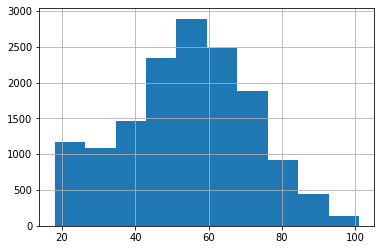

time: 218 ms (started: 2021-03-22 00:24:09 +01:00)


In [54]:
cleaned_profile['age'].hist()

=> The age > 100 years old are in the same row with the empy `gender` and `income`. This could be because of the customer does not want to specify their personal information.
The distribution of `age` feature are looks correct and therefore does not need to be cleaned any futher.

### 3.2.3 grouping `age` & drop `age`
In this section, I will group the age based on folowing information: 
- adolescence (13-18 years)
- adult (19-59 years) 
- senior adult (60 years and above)

In [55]:
cleaned_profile['age_group'] = pd.cut(cleaned_profile['age'], bins=[18, 59, 60, np.inf], labels = ['adolesence','adult','senior'], right=False)
cleaned_profile.head()

,gender,age,id,became_member_on,income,age_group
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,adolesence
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,senior
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,senior
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,senior
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,adolesence


time: 16 ms (started: 2021-03-22 00:24:09 +01:00)


In [56]:
cleaned_profile[cleaned_profile['age']==18]

,gender,age,id,became_member_on,income,age_group
116,M,18,716a961d2afb4c1d8307522a8cbb4f07,20160727,47000.0,adolesence
156,F,18,721eb06ac285463aa6e1184e0ea9b7f0,20170524,49000.0,adolesence
500,M,18,1a17eef552164fa79276342fc46c9364,20150503,48000.0,adolesence
659,F,18,c1e96618c1e74fd192f8a5bb29b014f3,20170619,67000.0,adolesence
750,M,18,d62cf96d9f19459e8ddb11720f1fa78c,20161031,36000.0,adolesence
...,...,...,...,...,...,...
14914,M,18,3fc54fb18cd94422bd02b5550002535b,20180310,40000.0,adolesence
15591,F,18,eb695e77fdb84f359f7de63eabe6bc5f,20170911,31000.0,adolesence
16039,M,18,c17fdcb8833f4759bb2854aeb594ff6d,20151209,58000.0,adolesence
16183,F,18,1d153ab70650433091710e2fb3146409,20170827,64000.0,adolesence


time: 31 ms (started: 2021-03-22 00:24:09 +01:00)


In [57]:
cleaned_profile.drop(columns=['age'], inplace=True)
cleaned_profile.head()

,gender,id,became_member_on,income,age_group
1,F,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,adolesence
3,F,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,senior
5,M,e2127556f4f64592b11af22de27a7932,20180426,70000.0,senior
8,M,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,senior
12,M,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,adolesence


time: 15 ms (started: 2021-03-22 00:24:09 +01:00)


### 3.2.4 convert `became_member_on` to DateTime

In [58]:
cleaned_profile['became_member_on'].head()

1     20170715
3     20170509
5     20180426
8     20180209
12    20171111
Name: became_member_on, dtype: int64

time: 0 ns (started: 2021-03-22 00:24:09 +01:00)


In [59]:
# convert `becaome_member_on` to datetime
cleaned_profile['became_member_on'] = pd.to_datetime(cleaned_profile['became_member_on'], format='%Y%m%d')
cleaned_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   id                14825 non-null  object        
 2   became_member_on  14825 non-null  datetime64[ns]
 3   income            14825 non-null  float64       
 4   age_group         14825 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), object(2)
memory usage: 593.7+ KB
time: 16 ms (started: 2021-03-22 00:24:09 +01:00)


In [60]:
cleaned_profile.head()

,gender,id,became_member_on,income,age_group
1,F,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,adolesence
3,F,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,senior
5,M,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,senior
8,M,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,senior
12,M,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,adolesence


time: 15 ms (started: 2021-03-22 00:24:09 +01:00)


In [61]:
print(f'Previous shape : {profile.shape}. After cleaning: {cleaned_profile.shape}')

Previous shape : (17000, 5). After cleaning: (14825, 5)
time: 0 ns (started: 2021-03-22 00:24:09 +01:00)


In [62]:
print(f"Min date: {cleaned_profile['became_member_on'].min()} & Maximum Date: {cleaned_profile['became_member_on'].max()}")

Min date: 2013-07-29 00:00:00 & Maximum Date: 2018-07-26 00:00:00
time: 0 ns (started: 2021-03-22 00:24:09 +01:00)


### Summary

In [63]:
cleaned_profile.describe()

,income
count,14825.000000
mean,65404.991568
std,21598.299410
min,30000.000000
25%,49000.000000
50%,64000.000000
75%,80000.000000
max,120000.000000


time: 16 ms (started: 2021-03-22 00:24:09 +01:00)


In [64]:
cleaned_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   id                14825 non-null  object        
 2   became_member_on  14825 non-null  datetime64[ns]
 3   income            14825 non-null  float64       
 4   age_group         14825 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), object(2)
memory usage: 593.7+ KB
time: 16 ms (started: 2021-03-22 00:24:10 +01:00)


## 3.3. Prepare `transcript` dataset

In [65]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


time: 16 ms (started: 2021-03-22 00:24:10 +01:00)


### 3.3.1 convert `value` to new colum(s)

In [66]:
# create a copy of `transcript` dataframe
cleaned_transcript = transcript.copy()

time: 16 ms (started: 2021-03-22 00:24:10 +01:00)


In [67]:
# get all possible dictionary key from the `value` column
value_keys = set()
def get_keys(x):
    value_keys.update(x.keys())
cleaned_transcript['value'].apply(get_keys)
value_keys

{'amount', 'offer id', 'offer_id', 'reward'}

time: 156 ms (started: 2021-03-22 00:24:10 +01:00)


=> there are only 3 possible values from the `value`-Feature. We will assume that the `offer id` and `offer_id` are the same value.

In [68]:
cleaned_transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


time: 16 ms (started: 2021-03-22 00:24:10 +01:00)


In [69]:
# creating a new feature `offer_id` from cleaned `value` feature
cleaned_transcript['offerid'] = cleaned_transcript['value'].apply(lambda elem: list(elem.values())[0])
cleaned_transcript.head(10)

,person,event,value,time,offerid
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0,f19421c1d4aa40978ebb69ca19b0e20d
6,c4863c7985cf408faee930f111475da3,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},0,2298d6c36e964ae4a3e7e9706d1fb8c2
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0,3f207df678b143eea3cee63160fa8bed
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7
9,31dda685af34476cad5bc968bdb01c53,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7


time: 203 ms (started: 2021-03-22 00:24:10 +01:00)


In [70]:
# drop value column 
cleaned_transcript.drop('value', axis=1, inplace=True)
cleaned_transcript.head(10)

,person,event,time,offerid
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0
5,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d
6,c4863c7985cf408faee930f111475da3,offer received,0,2298d6c36e964ae4a3e7e9706d1fb8c2
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
9,31dda685af34476cad5bc968bdb01c53,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7


time: 109 ms (started: 2021-03-22 00:24:10 +01:00)


### 3.3.2 drop if event-type `transaction`

In [71]:
cleaned_transcript = cleaned_transcript[cleaned_transcript['event'] != 'transaction']
cleaned_transcript.head()

,person,event,time,offerid
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0


time: 94 ms (started: 2021-03-22 00:24:10 +01:00)


In [72]:
cleaned_transcript.shape

(167581, 4)

time: 0 ns (started: 2021-03-22 00:24:10 +01:00)


### 3.3.3 drop if person is deleted
The `transcript` does not to be dropt if the person is deleted. The reason is, while merging the DataFrame, we will use join based on the `person_id`. So if the person already deleted, the following `transcript` data will not be included in the merged dataframe.

### 3.3.4 Rename column `person`

In [73]:
cleaned_transcript.rename(columns={'person': 'customer_id', 'offerid' : 'offer_id', 'event': 'event_type' }, inplace=True)
cleaned_transcript.head()

,customer_id,event_type,time,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0


time: 31 ms (started: 2021-03-22 00:24:10 +01:00)


### 3.3.5 One-hot-encoding `event_type` and concat into transcript

In [74]:
event_temp = pd.get_dummies(cleaned_transcript['event_type'], prefix='event')
print(event_temp.head())

   event_offer completed  event_offer received  event_offer viewed
0                      0                     1                   0
1                      0                     1                   0
2                      0                     1                   0
3                      0                     1                   0
4                      0                     1                   0
time: 47 ms (started: 2021-03-22 00:24:10 +01:00)


In [75]:
event_temp.rename(columns={'event_offer completed': 'event_offer_completed', 'event_offer received' : 'event_offer_received', 'event_offer viewed': 'event_offer_viewed' }, inplace=True)
event_temp.head()

,event_offer_completed,event_offer_received,event_offer_viewed
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


time: 16 ms (started: 2021-03-22 00:24:10 +01:00)


In [76]:
cleaned_transcript = pd.concat([cleaned_transcript, event_temp], axis=1)
cleaned_transcript.head()

,customer_id,event_type,time,offer_id,event_offer_completed,event_offer_received,event_offer_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0


time: 47 ms (started: 2021-03-22 00:24:10 +01:00)


In [77]:
# cleaned_transcript = cleaned_transcript.drop('event_type', axis = 1)
#cleaned_transcript.head()

time: 0 ns (started: 2021-03-22 00:24:10 +01:00)


### 3.3.6 Creating feature `offer_successful`
I will use the new feature `offer_successful` as target-feature for the prediction model. The feature will describe if a customer viewed the offer and therefore completed the reward.  

In [78]:
cleaned_transcript[(cleaned_transcript['customer_id'] == '0009655768c64bdeb2e877511632db8f') & (cleaned_transcript['offer_id'] == '2906b810c7d4411798c6938adc9daaa5')]

,customer_id,event_type,time,offer_id,event_offer_completed,event_offer_received,event_offer_viewed
247879,0009655768c64bdeb2e877511632db8f,offer received,576,2906b810c7d4411798c6938adc9daaa5,0,1,0
258884,0009655768c64bdeb2e877511632db8f,offer completed,576,2906b810c7d4411798c6938adc9daaa5,1,0,0


time: 78 ms (started: 2021-03-22 00:24:10 +01:00)


In [79]:
# Group by `person_id` and `offer_id`
cleaned_transcript_group = cleaned_transcript.groupby(['customer_id', 'offer_id'])['event_type'].agg(['sum']).reset_index()
cleaned_transcript_group.head()

,customer_id,offer_id,sum
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,offer receivedoffer completed
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,offer receivedoffer viewed
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,offer receivedoffer viewed
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,offer receivedoffer completedoffer viewed
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,offer receivedoffer completedoffer viewed


time: 6.06 s (started: 2021-03-22 00:24:11 +01:00)


In [80]:
# add new feature `offer_successful`
cleaned_transcript_group['offer_successful'] = cleaned_transcript_group['sum'].str.contains('viewed') \
    & cleaned_transcript_group['sum'].str.contains('completed')
cleaned_transcript_group.head()

,customer_id,offer_id,sum,offer_successful
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,offer receivedoffer completed,False
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,offer receivedoffer viewed,False
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,offer receivedoffer viewed,False
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,offer receivedoffer completedoffer viewed,True
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,offer receivedoffer completedoffer viewed,True


time: 141 ms (started: 2021-03-22 00:24:17 +01:00)


In [81]:
cleaned_transcript_group.drop(columns=['sum'], inplace=True)
cleaned_transcript_group

,customer_id,offer_id,offer_successful
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,False
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,False
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,False
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,True
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,True
...,...,...,...
63283,fffad4f4828548d1b5583907f2e9906b,f19421c1d4aa40978ebb69ca19b0e20d,True
63284,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,True
63285,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,True
63286,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,True


time: 16 ms (started: 2021-03-22 00:24:17 +01:00)


Merge the `offer_successful` feature into the  `cleaned_transcript`.

In [82]:
#cleaned_transcript = pd.merge(cleaned_transcript, received_completed,  how='left', left_on=['customer_id','offer_id'], right_on = ['customer_id','offer_id']).drop(columns=['sum'])
#cleaned_transcript.head()

time: 0 ns (started: 2021-03-22 00:24:17 +01:00)


### Summary

In [83]:
cleaned_transcript_group.describe()

,customer_id,offer_id,offer_successful
count,63288,63288,63288
unique,16994,10,2
top,95e879c99aea4bec91f21aa0b355dcee,0b1e1539f2cc45b7b9fa7c272da2e1d7,False
freq,6,6374,38828


time: 62 ms (started: 2021-03-22 00:24:17 +01:00)


In [84]:
cleaned_transcript_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63288 entries, 0 to 63287
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       63288 non-null  object
 1   offer_id          63288 non-null  object
 2   offer_successful  63288 non-null  bool  
dtypes: bool(1), object(2)
memory usage: 1.0+ MB
time: 15 ms (started: 2021-03-22 00:24:17 +01:00)


## 3.4 Merging all 3 dataframes

In [85]:
cleaned_portfolio.head()

,reward,difficulty,duration,offer_type,id,email,web,mobile,social
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0


time: 15 ms (started: 2021-03-22 00:24:17 +01:00)


In [86]:
cleaned_profile.head()

,gender,id,became_member_on,income,age_group
1,F,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,adolesence
3,F,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,senior
5,M,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,senior
8,M,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,senior
12,M,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,adolesence


time: 16 ms (started: 2021-03-22 00:24:17 +01:00)


In [87]:
cleaned_transcript_group.head()

,customer_id,offer_id,offer_successful
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,False
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,False
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,False
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,True
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,True


time: 16 ms (started: 2021-03-22 00:24:17 +01:00)


### 3.4.1 Merge `profile` and `transcript`

In [88]:
merged_dataframe = cleaned_profile.merge(cleaned_transcript_group , left_on='id', right_on='customer_id')
merged_dataframe.head(10)

,gender,id,became_member_on,income,age_group,customer_id,offer_id,offer_successful
0,F,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,adolesence,0610b486422d4921ae7d2bf64640c50b,3f207df678b143eea3cee63160fa8bed,False
1,F,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,adolesence,0610b486422d4921ae7d2bf64640c50b,9b98b8c7a33c4b65b9aebfe6a799e6d9,False
2,F,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,senior,78afa995795e4d85b5d9ceeca43f5fef,5a8bc65990b245e5a138643cd4eb9837,False
3,F,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,senior,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,True
4,F,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,senior,78afa995795e4d85b5d9ceeca43f5fef,ae264e3637204a6fb9bb56bc8210ddfd,True
5,F,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,senior,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,True
6,M,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,senior,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,False
7,M,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,senior,e2127556f4f64592b11af22de27a7932,3f207df678b143eea3cee63160fa8bed,False
8,M,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,senior,e2127556f4f64592b11af22de27a7932,9b98b8c7a33c4b65b9aebfe6a799e6d9,True
9,M,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,senior,e2127556f4f64592b11af22de27a7932,fafdcd668e3743c1bb461111dcafc2a4,True


time: 46 ms (started: 2021-03-22 00:24:17 +01:00)


Because of the **left join** between `profile` and `transcript`, the transcript data with deleted `profile` will be automatically not merged.

### 3.4.2 Merge `portfolio` with `profile` and `transcript`

In [89]:
merged_dataframe = cleaned_portfolio.merge(merged_dataframe , left_on='id', right_on='offer_id')
merged_dataframe.head(10)

,reward,difficulty,duration,offer_type,id_x,email,web,mobile,social,gender,id_y,became_member_on,income,age_group,customer_id,offer_id,offer_successful
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1,F,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,senior,78afa995795e4d85b5d9ceeca43f5fef,ae264e3637204a6fb9bb56bc8210ddfd,True
1,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1,F,aa4862eba776480b8bb9c68455b8c2e1,2017-09-11,57000.0,senior,aa4862eba776480b8bb9c68455b8c2e1,ae264e3637204a6fb9bb56bc8210ddfd,True
2,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1,M,e12aeaf2d47d42479ea1c4ac3d8286c6,2014-02-13,46000.0,adolesence,e12aeaf2d47d42479ea1c4ac3d8286c6,ae264e3637204a6fb9bb56bc8210ddfd,False
3,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1,M,62cf5e10845442329191fc246e7bcea3,2014-11-13,52000.0,adolesence,62cf5e10845442329191fc246e7bcea3,ae264e3637204a6fb9bb56bc8210ddfd,True
4,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1,F,a448667f336b42c9a66fc5ffd5d73772,2018-05-01,40000.0,senior,a448667f336b42c9a66fc5ffd5d73772,ae264e3637204a6fb9bb56bc8210ddfd,False
5,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1,M,4b0da7e80e5945209a1fdddfe813dbe0,2017-09-09,100000.0,senior,4b0da7e80e5945209a1fdddfe813dbe0,ae264e3637204a6fb9bb56bc8210ddfd,True
6,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1,M,5917d13f6fa04286abdf95f4d5cefb1e,2014-08-23,96000.0,senior,5917d13f6fa04286abdf95f4d5cefb1e,ae264e3637204a6fb9bb56bc8210ddfd,False
7,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1,M,1e9420836d554513ab90eba98552d0a9,2017-09-25,70000.0,adolesence,1e9420836d554513ab90eba98552d0a9,ae264e3637204a6fb9bb56bc8210ddfd,False
8,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1,M,f082d80f0aac47a99173ba8ef8fc1909,2016-07-09,33000.0,adolesence,f082d80f0aac47a99173ba8ef8fc1909,ae264e3637204a6fb9bb56bc8210ddfd,False
9,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1,F,102e9454054946fda62242d2e176fdce,2016-08-14,57000.0,senior,102e9454054946fda62242d2e176fdce,ae264e3637204a6fb9bb56bc8210ddfd,True


time: 47 ms (started: 2021-03-22 00:24:17 +01:00)


In [90]:
merged_dataframe.shape

(55222, 17)

time: 0 ns (started: 2021-03-22 00:24:17 +01:00)


In [91]:
# Remove double column, customer_id and offer_id
merged_dataframe = merged_dataframe.drop(['id_x','id_y', 'offer_id', 'customer_id'], axis=1, errors='ignore') # the flag errors to make sure that this command could be called twice
merged_dataframe

,reward,difficulty,duration,offer_type,email,web,mobile,social,gender,became_member_on,income,age_group,offer_successful
0,10,10,7,bogo,1,0,1,1,F,2017-05-09,100000.0,senior,True
1,10,10,7,bogo,1,0,1,1,F,2017-09-11,57000.0,senior,True
2,10,10,7,bogo,1,0,1,1,M,2014-02-13,46000.0,adolesence,False
3,10,10,7,bogo,1,0,1,1,M,2014-11-13,52000.0,adolesence,True
4,10,10,7,bogo,1,0,1,1,F,2018-05-01,40000.0,senior,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55217,2,10,7,discount,1,1,1,0,M,2016-06-29,93000.0,senior,False
55218,2,10,7,discount,1,1,1,0,F,2016-07-16,78000.0,senior,False
55219,2,10,7,discount,1,1,1,0,M,2018-01-04,51000.0,senior,False
55220,2,10,7,discount,1,1,1,0,F,2017-09-17,72000.0,adolesence,False


time: 63 ms (started: 2021-03-22 00:24:17 +01:00)


## 3.5 Encoding categorical column

In [92]:
merged_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55222 entries, 0 to 55221
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   reward            55222 non-null  int64         
 1   difficulty        55222 non-null  int64         
 2   duration          55222 non-null  int64         
 3   offer_type        55222 non-null  object        
 4   email             55222 non-null  int32         
 5   web               55222 non-null  int32         
 6   mobile            55222 non-null  int32         
 7   social            55222 non-null  int32         
 8   gender            55222 non-null  object        
 9   became_member_on  55222 non-null  datetime64[ns]
 10  income            55222 non-null  float64       
 11  age_group         55222 non-null  category      
 12  offer_successful  55222 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), int32(4), int64(3), 

In [93]:
categorical_column = ['offer_type', 'gender', 'age_group']

time: 0 ns (started: 2021-03-22 00:24:17 +01:00)


In [94]:
merge_dataframe_encoded = merged_dataframe.copy()
merge_dataframe_encoded.head()

,reward,difficulty,duration,offer_type,email,web,mobile,social,gender,became_member_on,income,age_group,offer_successful
0,10,10,7,bogo,1,0,1,1,F,2017-05-09,100000.0,senior,True
1,10,10,7,bogo,1,0,1,1,F,2017-09-11,57000.0,senior,True
2,10,10,7,bogo,1,0,1,1,M,2014-02-13,46000.0,adolesence,False
3,10,10,7,bogo,1,0,1,1,M,2014-11-13,52000.0,adolesence,True
4,10,10,7,bogo,1,0,1,1,F,2018-05-01,40000.0,senior,False


time: 31 ms (started: 2021-03-22 00:24:17 +01:00)


In [95]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()

time: 0 ns (started: 2021-03-22 00:24:17 +01:00)


In [96]:
for cat in categorical_column:
    merge_dataframe_encoded[cat] = le.fit_transform(merge_dataframe_encoded[cat])

merge_dataframe_encoded.head()

,reward,difficulty,duration,offer_type,email,web,mobile,social,gender,became_member_on,income,age_group,offer_successful
0,10,10,7,0,1,0,1,1,0,2017-05-09,100000.0,2,True
1,10,10,7,0,1,0,1,1,0,2017-09-11,57000.0,2,True
2,10,10,7,0,1,0,1,1,1,2014-02-13,46000.0,0,False
3,10,10,7,0,1,0,1,1,1,2014-11-13,52000.0,0,True
4,10,10,7,0,1,0,1,1,0,2018-05-01,40000.0,2,False


time: 31 ms (started: 2021-03-22 00:24:17 +01:00)


## 3.6 Correlation of the feature column

In [97]:
merge_dataframe_encoded.head()

,reward,difficulty,duration,offer_type,email,web,mobile,social,gender,became_member_on,income,age_group,offer_successful
0,10,10,7,0,1,0,1,1,0,2017-05-09,100000.0,2,True
1,10,10,7,0,1,0,1,1,0,2017-09-11,57000.0,2,True
2,10,10,7,0,1,0,1,1,1,2014-02-13,46000.0,0,False
3,10,10,7,0,1,0,1,1,1,2014-11-13,52000.0,0,True
4,10,10,7,0,1,0,1,1,0,2018-05-01,40000.0,2,False


time: 16 ms (started: 2021-03-22 00:24:17 +01:00)


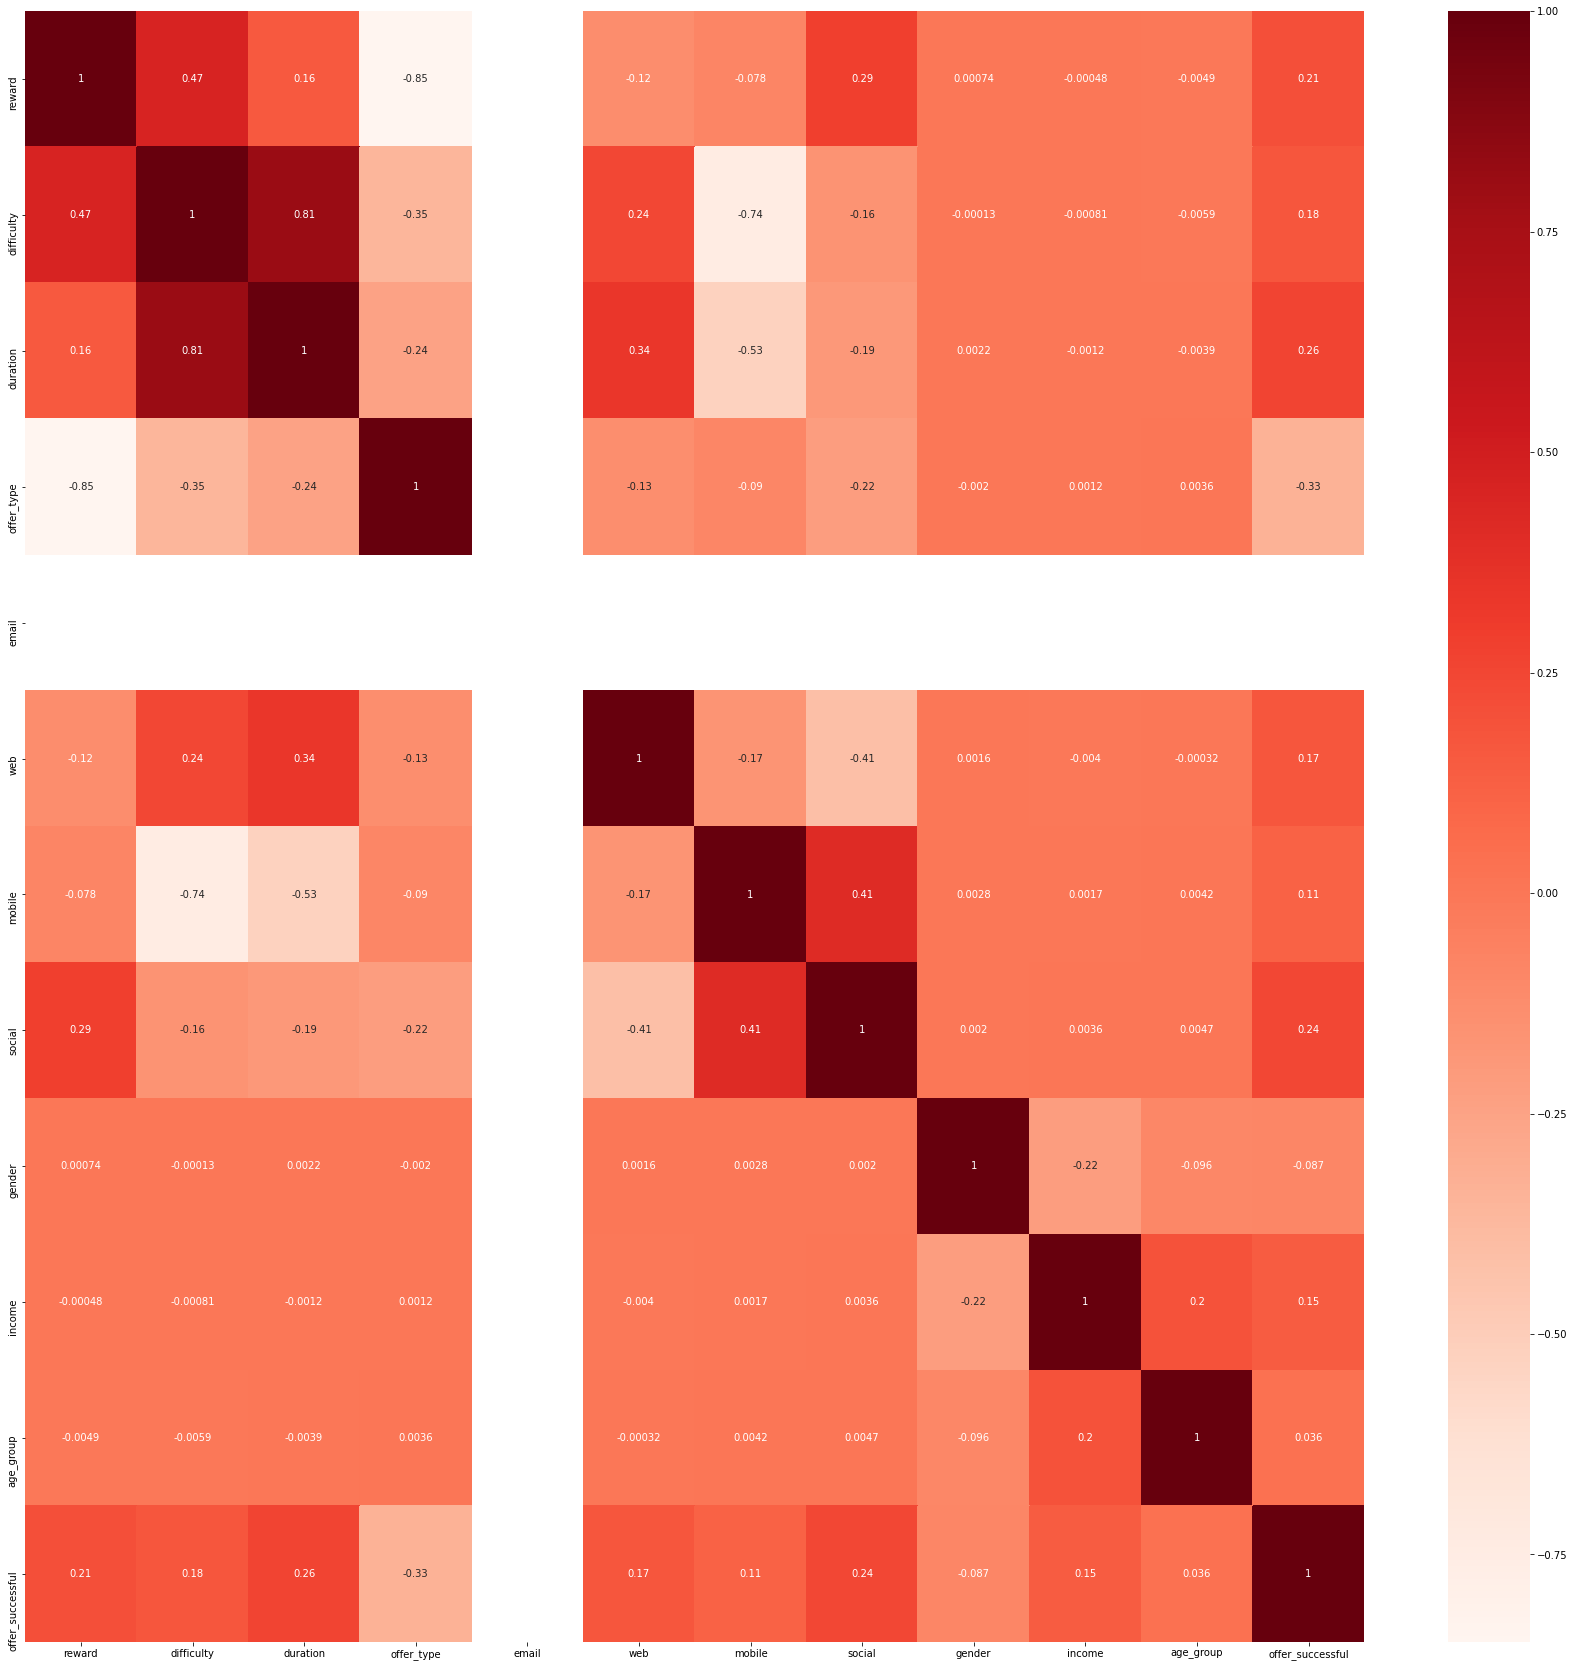

time: 1.31 s (started: 2021-03-22 00:24:18 +01:00)


In [98]:
# plotting heatmap
plt.figure(figsize=(30,30))
cor = merge_dataframe_encoded.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

As we can see, the higest correlation is from the feature `duration`, followed by `social` and `reward`. 

## 3.7 Dropping `became_member_on`

I will drop the feature `became_member_on` in this project, with the reason that there is not enough information, when the data collected at. So we could not get an absolute timepoint.
But for further investigation, or the next project, this feature could be divided into `year` and `month`, and could be used for the prediction of the model.

In [99]:
merge_dataframe_encoded.drop(columns=['became_member_on'], inplace=True)

time: 0 ns (started: 2021-03-22 00:24:19 +01:00)


In [100]:
merged_dataframe.drop(columns=['became_member_on'], inplace=True)

time: 0 ns (started: 2021-03-22 00:24:19 +01:00)


## 3.5 Create target feature

In [101]:
target_cols = 'offer_successful'
feature_cols = merge_dataframe_encoded.columns.tolist()
feature_cols.remove(target_cols)
feature_cols

['reward',
 'difficulty',
 'duration',
 'offer_type',
 'email',
 'web',
 'mobile',
 'social',
 'gender',
 'income',
 'age_group']

time: 0 ns (started: 2021-03-22 00:24:19 +01:00)


In [102]:
data = merge_dataframe_encoded[feature_cols]
#assigning the `offer_successful` column as target
target = merge_dataframe_encoded[target_cols]

time: 0 ns (started: 2021-03-22 00:24:19 +01:00)


# 4. Data analysis and data model

Following questions will be examined and answered:
- How much starbucks customer completed a reward ?
- What kind of offer type most customer view and completed?
- Could a prediction be made, either a customer will take a reward or not? So a targeted marketing could be done!

Until now there are only 2 dataframes that we could use for analysis:
- **merged_dataframe** : dataframe that still containing `offer_type`, `gender` as text, and
- **merged_dataframe_encoded** : dataframe that contains `offer_type` and `gender` as encoded information. This dataframe will be used for the model prediction

In [103]:
merged_dataframe.head()

,reward,difficulty,duration,offer_type,email,web,mobile,social,gender,income,age_group,offer_successful
0,10,10,7,bogo,1,0,1,1,F,100000.0,senior,True
1,10,10,7,bogo,1,0,1,1,F,57000.0,senior,True
2,10,10,7,bogo,1,0,1,1,M,46000.0,adolesence,False
3,10,10,7,bogo,1,0,1,1,M,52000.0,adolesence,True
4,10,10,7,bogo,1,0,1,1,F,40000.0,senior,False


time: 15 ms (started: 2021-03-22 00:24:19 +01:00)


## 4.1 Demographic distribution of starbucks customer

In [106]:
offer_taken = merged_dataframe[merged_dataframe['offer_successful']]
offer_taken

,reward,difficulty,duration,offer_type,email,web,mobile,social,gender,income,age_group,offer_successful
0,10,10,7,bogo,1,0,1,1,F,100000.0,senior,True
1,10,10,7,bogo,1,0,1,1,F,57000.0,senior,True
3,10,10,7,bogo,1,0,1,1,M,52000.0,adolesence,True
5,10,10,7,bogo,1,0,1,1,M,100000.0,senior,True
9,10,10,7,bogo,1,0,1,1,F,57000.0,senior,True
...,...,...,...,...,...,...,...,...,...,...,...,...
55202,2,10,7,discount,1,1,1,0,M,60000.0,adolesence,True
55206,2,10,7,discount,1,1,1,0,M,57000.0,senior,True
55207,2,10,7,discount,1,1,1,0,M,51000.0,adolesence,True
55210,2,10,7,discount,1,1,1,0,F,80000.0,senior,True


time: 31 ms (started: 2021-03-22 00:28:46 +01:00)


In [104]:
offer_not_taken = merged_dataframe[merged_dataframe['offer_successful'] != True]
offer_not_taken

,reward,difficulty,duration,offer_type,email,web,mobile,social,gender,income,age_group,offer_successful
2,10,10,7,bogo,1,0,1,1,M,46000.0,adolesence,False
4,10,10,7,bogo,1,0,1,1,F,40000.0,senior,False
6,10,10,7,bogo,1,0,1,1,M,96000.0,senior,False
7,10,10,7,bogo,1,0,1,1,M,70000.0,adolesence,False
8,10,10,7,bogo,1,0,1,1,M,33000.0,adolesence,False
...,...,...,...,...,...,...,...,...,...,...,...,...
55217,2,10,7,discount,1,1,1,0,M,93000.0,senior,False
55218,2,10,7,discount,1,1,1,0,F,78000.0,senior,False
55219,2,10,7,discount,1,1,1,0,M,51000.0,senior,False
55220,2,10,7,discount,1,1,1,0,F,72000.0,adolesence,False


time: 31 ms (started: 2021-03-22 00:24:19 +01:00)


In [108]:
print(f'The proportion of customer that taken taken the offer are : {offer_taken.shape[0]/merged_dataframe.shape[0]}')

The proportion of customer that taken taken the offer are : 0.42553692368983376
time: 0 ns (started: 2021-03-22 00:29:06 +01:00)


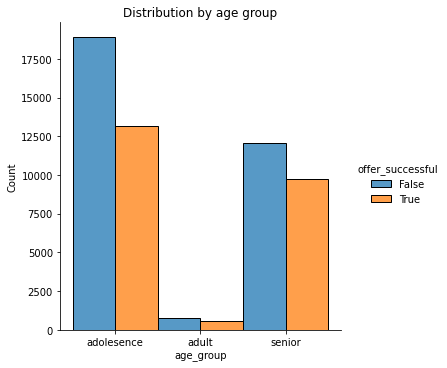

time: 375 ms (started: 2021-03-22 00:29:06 +01:00)


In [109]:
sns.displot(merged_dataframe, x="age_group", hue="offer_successful", multiple="dodge").set(title='Distribution by age group')

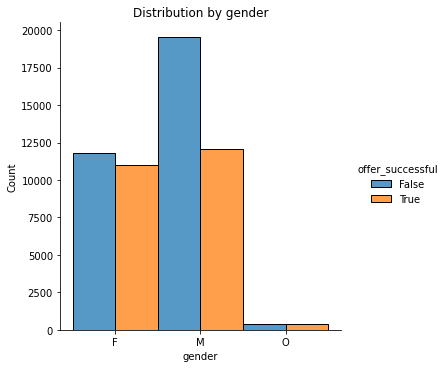

time: 516 ms (started: 2021-03-22 00:29:06 +01:00)


In [110]:
sns.displot(merged_dataframe, x="gender", hue="offer_successful", multiple="dodge").set(title='Distribution by gender')

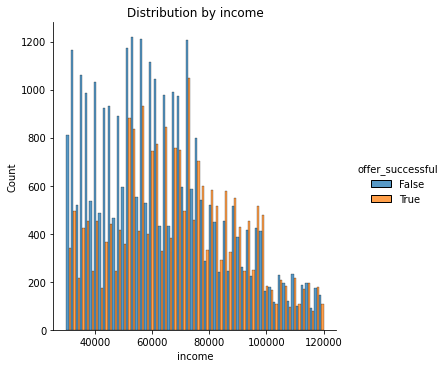

time: 750 ms (started: 2021-03-22 00:29:06 +01:00)


In [111]:
sns.displot(merged_dataframe, x="income", hue="offer_successful", multiple="dodge").set(title='Distribution by income')

## 4.2 Distribution of offer 

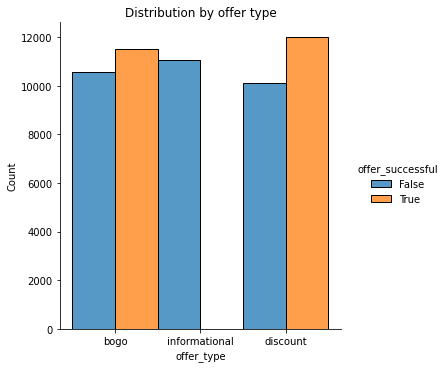

time: 360 ms (started: 2021-03-22 00:29:07 +01:00)


In [112]:
sns.displot(merged_dataframe, x="offer_type", hue="offer_successful", multiple="dodge").set(title='Distribution by offer type')

## 4.3 Model to predict if a customer take an offer

In this part, I will train a model with following classifier: 
- Linear SVC
- KNeighbourhood
- AdaBoost

**Linear SVC** and **KNeighbourhood** are chosen based on scikit-learn [page](https://scikit-learn.org/stable/tutorial/machine_learning_map/). AdaBoost are chosen, because previous experience with the classifier and has a good performace and speed for training a model.

To measure the performance of the model, I will use **F-Score** and **accuracy**.

### 4.3.1 Splitting into train and test data

In [113]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

time: 16 ms (started: 2021-03-22 00:29:08 +01:00)


In [114]:
X_train.head()

,reward,difficulty,duration,offer_type,email,web,mobile,social,gender,income,age_group
23882,5,20,10,1,1,1,0,0,0,87000.0,0
4412,10,10,7,0,1,0,1,1,0,38000.0,0
50491,2,10,7,1,1,1,1,0,0,97000.0,0
45343,5,5,5,0,1,1,1,1,2,42000.0,0
16156,0,0,4,2,1,1,1,0,0,83000.0,2


time: 16 ms (started: 2021-03-22 00:29:08 +01:00)


In [115]:
y_train.head()

23882     True
4412     False
50491    False
45343     True
16156    False
Name: offer_successful, dtype: bool

time: 0 ns (started: 2021-03-22 00:29:08 +01:00)


### 4.3.2 Linear SVC

#### Training model

In [119]:
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
svc_model.fit(X_train, y_train)

#train the algorithm on training data and predict using the testing data
model_svc = svc_model.fit(X_train, y_train)

C:\Users\victo\anaconda3\envs\starbucks-capstone\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


time: 7.81 s (started: 2021-03-22 00:30:46 +01:00)


C:\Users\victo\anaconda3\envs\starbucks-capstone\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Prediction & evaluation

In [120]:
y_pred = model_svc.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy for the model :  0.5763279192273925
F1-score for the model :  0.42142737742509156
time: 16 ms (started: 2021-03-22 00:30:54 +01:00)


### 4.3.3. KNeighbourhood

#### Training model

In [121]:
#create object of the classifier
neigh_model = KNeighborsClassifier(n_neighbors=3)

#Train the algorithm
model_neighbourhood = neigh_model.fit(X_train, y_train)

time: 187 ms (started: 2021-03-22 00:31:46 +01:00)


#### Prediction & evaluation

In [122]:
y_pred = model_neighbourhood.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy for the model :  0.6927129060579456
F1-score for the model :  0.6934513838220744
time: 797 ms (started: 2021-03-22 00:31:47 +01:00)


### 4.3.4 AdaBoost

#### Training model

The most important parameters for AdaBoost are [**base_estimator, n_estimators, and learning_rate.**](https://chrisalbon.com/machine_learning/trees_and_forests/adaboost_classifier/). But I will just use the **n_estimators** and let the other parameter as it is (default). 

In [123]:
#create object of the classifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)

#Train the algorithm
model_ada = ada_model.fit(X_train, y_train)

time: 2.23 s (started: 2021-03-22 00:31:47 +01:00)


#### Prediction & evaluation

In [124]:
y_pred = model_ada.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy for the model :  0.7378182616330115
F1-score for the model :  0.7386484432107018
time: 344 ms (started: 2021-03-22 00:31:50 +01:00)


### Summary

From the 3 classifier above, only AdaBoost that could predict with astounding **accuracy (73.78%)** and **F1-Score (73.86%)**.

# 5. Conclusion & further work
Personally, I found this capstone project is challenging, mainly because of the given dataset are not clean, such as customer's age that higher than 118 years old and still getting an offer. Other than that, the feature "age" has continuous type, and I need to group the age.

The feature "became_member_on" is another challenge, because I could only find the oldest date and the newest date. Without any reference to a fixed time, I could not use the feature. 
The chosen classifier used to predict either a customer will complete an offer is AdaBoost. The algorithm give the highest accuracy and F1-Score.
  
**Further Work** 
- Use the "became_member_on" as part of a feature for prediction model. The newest date could be used as a reference point.
- Unsupervised Machine Learning Algorithm could be implemented to find better prediction model.
- Find customer segment so some personalized offer could be directed to the segment.
- Further investigation for discount program. Why discount program has more completed offer in comparison with the bogo program.